<a href="https://colab.research.google.com/github/Leeyounghun94/AIStudy24/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

올바른 결과를 도출을 위해서 데이터를 사용하기 전에 데이터 전처리 과정을 거쳐야한다.

전처리 과정을 거친 데이터로 훈련했을 때의 차이를 알고 표준 점수로 특성의 스케일 변환 해보자.

만약, 길이가 25cm이고 무게가 150g이면 도미인데, 빙어로 결론이 나온다면??

In [1]:
# 앞쪽 35개는 도미(1), 뒤쪽 14개는 빙어(0) -> 총 49개
# 도미와 빙어 데이터 49개
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np      # 넘파이 배열용 파이썬 라이브러리

np.column_stack(([1,2,3],[4,5,6]))      # .column(열) _stack(쌓는다)

array([[1, 4],
       [2, 5],
       [3, 6]])

In [3]:
fish_data = np.column_stack((fish_length, fish_weight))
# fish_data 변수에 2차원 배열을 넣는다. (앞쪽 : 길이, 뒤쪽 : 무게)
print(fish_data[:5]) # 앞 쪽 5개를 미리보기 해본다.

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [4]:
# 정답 파일 생성하기.
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [5]:
print(np.zeros(10))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))   # concatenate 1차원 배열(1 = 35, 0 = 14)
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

print(train_input.shape, test_input.shape)
# train_input 훈련용 입력값
# test_input 테스트용 입력값
# train_target 훈련용 정답
# test_target 테스트용 정답
# stratify : 타겟값을 넣어줌(target의 class 비율을 유지한 채 데이터셋을 split한다.)
# random_state : 시드값을 42 지정하고 랜덤 적용(수업용)

(36, 2) (13, 2)


In [8]:
print(train_target.shape, test_target.shape)    # 결과가 () 튜플로 나옴

(36,) (13,)


In [9]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
from sklearn.neighbors import KNeighborsClassifier # k-이웃 근접 알고리즘

kn = KNeighborsClassifier() # 객체 생성
kn.fit(train_input, train_target)   # fit (훈련시작!)

KNeighborsClassifier()

In [11]:
kn.score(test_input, test_target)    # 평가 시작! (테스트입력, 테스트정답)

1.0

In [12]:
print(kn.predict([[25, 150]]))  # 도미 25cm, 150g 처리 결과 -> 0 (빙어?!?!)

[0.]


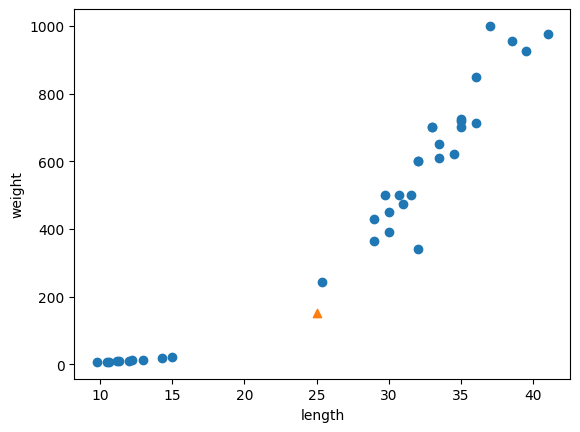

In [13]:
# 그러면 그래프로 확인해보자.

import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')    # '^' ▲ 모양이 나온다. 또는 마커 종류 변경 시 참고 https://streamls.tistory.com/entry/Python-matplotlib-%EB%A7%88%EC%BB%A4marker
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

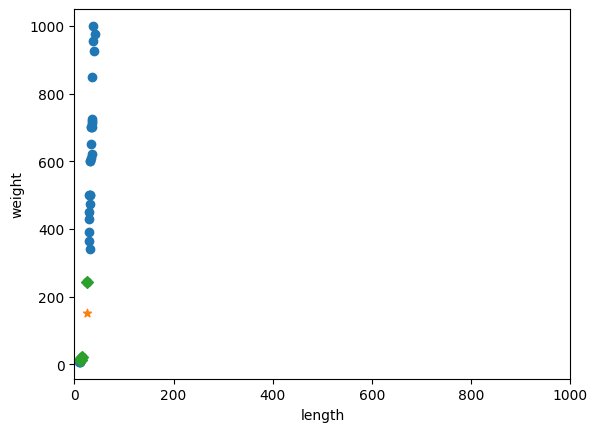

In [18]:
# 결론 x와 y축 비율이 다르기 때문에 정확한 그래프로 판단할 수 없다.
# k-근접 이웃 알고리즘은 주변에 있는 5개를 보기 때문에 좀 더 알아볼 필요가 있다.

distances, indexes = kn.kneighbors([[25, 150]]) # 내가 알고 싶은 값의 거리와 인덱스를 알아보자.

plt.scatter(train_input[:,0], train_input[:,1])     # 입력 데이터 값
plt.scatter(25, 150, marker="*")                    # 알고 싶은 값
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker= 'D')      # 이웃에 값
plt.xlim((0, 1000))     # x축에 범위를 0 ~ 1000 까지로 지정
plt.xlabel("length")
plt.ylabel("weight")
plt.show()  # 결론, 녹색으로 25, 150에 대한 이웃이 누구인지 파악이 됨.

In [19]:
print(train_input[indexes]) # k-최근접 알고리즘에 근접한 5개의 값 (도미 1개, 빙어 4개)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [20]:
print(train_target[indexes])    # 도미 1개, 빙어 4개

[[1. 0. 0. 0. 0.]]


In [21]:
print(distances) # 이웃간의 거리 출력

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [22]:
# 평균 구해보기(가장 널리 사용하는 전처리 방법은 : 표준점수, z점수라고 함)
# 표준 점수는 각 특성 값이 평균에서 표준 편차의 몇 배 만큼 떨어져 있는지를 나타냄.
# 분산은 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 내어 구함
# 표준 편차는 분산의 제곱근으로 데이터가 분산된 정도를 나타낸다.
# 표준 점수는 각 데이터가 원점에서 몇 표준 편차 만큼 떨어져 있는지 나타내는 값

mean = np.mean(train_input, axis = 0)   # mean = 평균, axis = 중심선
std = np.std(train_input, axis=0)       # std = 표준 편차를 구한다.
# train_input -> 36개의 요소와 2개의 특성을 가진다. (36, 2) 크기의 배열임
# 행을 따라 각 열의 통계 값을 계산함.
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [23]:
# 원본 데이터에서 평균을 빼고 표준편차로 나누어 표준점수를 변환
train_scaled = (train_input - mean) / std   # 표준 점수 공식(암기 필수)
# 원본 데이터에서 평균을 빼고 표준 편차로 나눔
# 넘파이는 train_input의 모든 행에서 mean에 있는 두 평균 값을 빼준다.
# std에 있는 두 표준 편차를 다시 모든 행에 적용한다.    (이 기법을 브로드캐스팅)

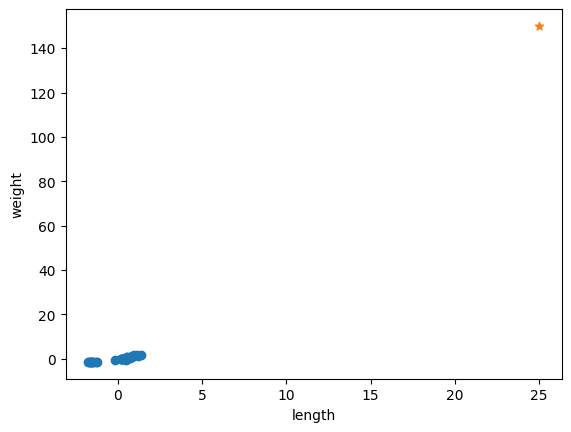

In [24]:
# 전처리 데이터 이용해서 모델 훈련 시키기

plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(25, 150, marker="*") # 추가 데이터
plt.xlabel("length")
plt.ylabel("weight")
plt.show() # 오른쪽 맨 꼭대기에 수상한 샘플이 생긴다.
# 전처리된 데이터는 표준 점수를 위해서 값이 축소 되어 있는데 알고자 하는 값은 표준 점수화가 안된다.
# 훈련세트를 평균으로 빼고 표준편차로 나누어 줬기 때문에 값의 범위가 달라진다.

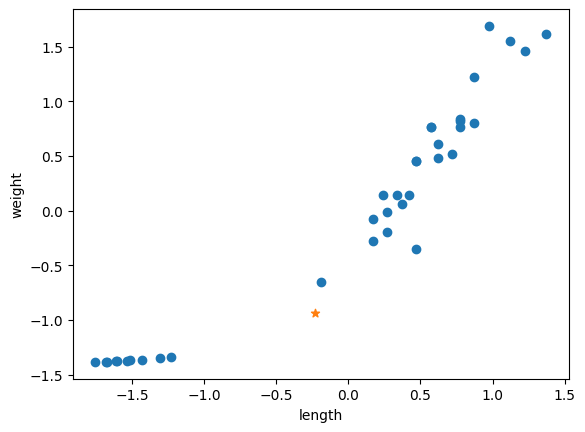

In [25]:
# 동일한 기준으로 샘플 변환하고 출력

new = ([25, 150] -mean) / std       # 이 공식이 중요함!
plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker="*") # 배열로 생성하고 표준 편차 적용 후 추가 데이터
plt.xlabel("length")
plt.ylabel("weight")
plt.show()
# x, y축의 범위가 비슷하다. (-1.5 ~ 1.5 사이 값)

In [26]:
# 훈련 시작

kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [28]:
test_scaled = (test_input - mean) / std     # 표준 점수화

In [29]:
kn.score=(test_scaled, test_target)  # 평가 진행
print(kn.predict([new])) # 25, 150짜리 결과를 보면
# [1.]  도미로 예측 성공

[1.]


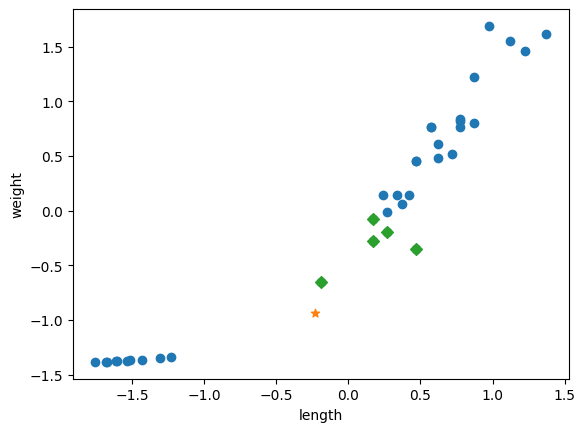

In [30]:
# kneighbors()로 최근접 이웃을 구한 다음 산점도를 그려본다.

distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker="*")
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()